In [29]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [30]:
df=pd.read_csv('csv/aps_failure_training_set.csv')
#df2=pd.read_csv('csv/aps_failure_test_set.csv')
#df=pd.concat((df1,df2),axis=0)

In [31]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [32]:
null_cnt = {}
features = list(df.columns)
features.remove('class')

for i in features:
    column = df[i]
    try:
        nans = column.value_counts()['na']
    except KeyError:
        nans = 0
    null_cnt[i] = nans
null_perc = {f:(c/60000) for f,c in null_cnt.items()}

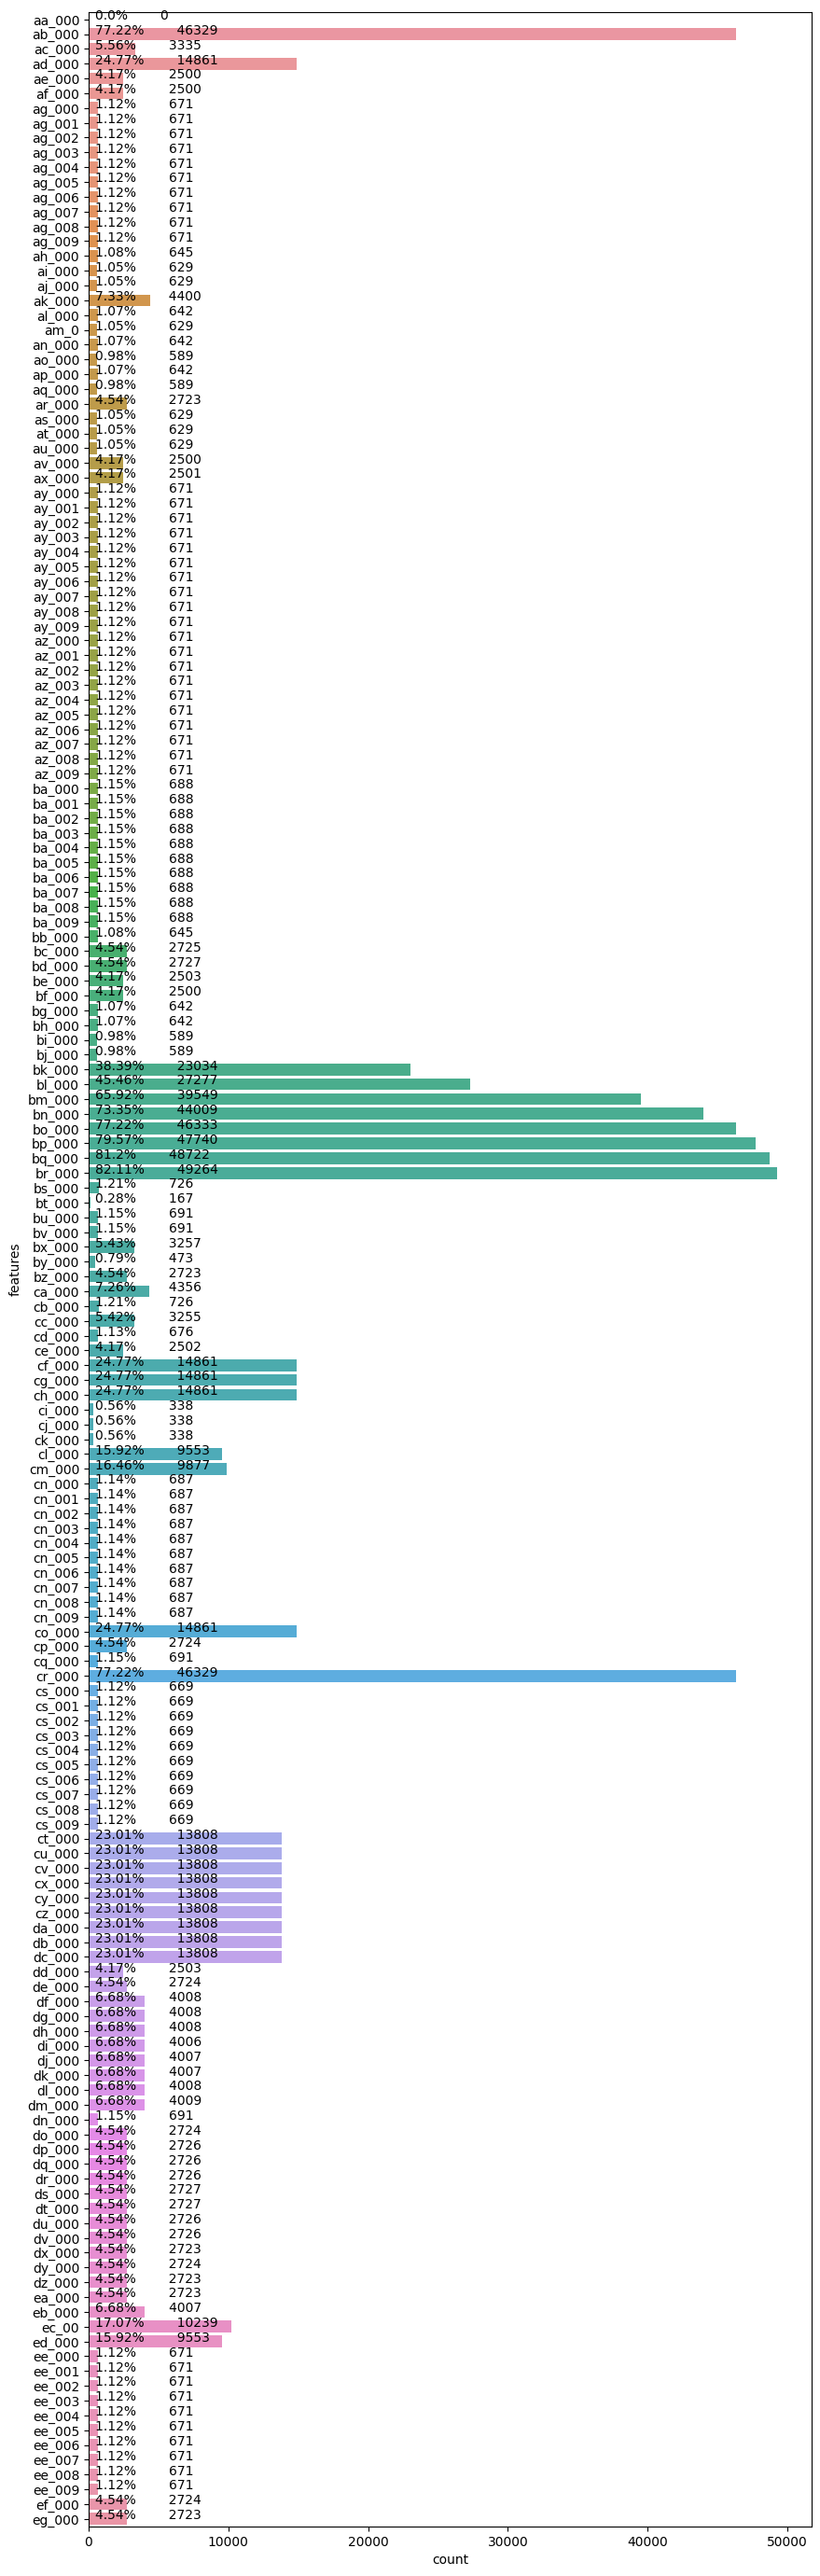

In [33]:
fig,ax=plt.subplots(figsize=(10,35))
bar=sns.barplot(y=list(null_cnt.keys()),x=list(null_cnt.values()))
plt.ylabel('features')
plt.xlabel('count')
ft_perc = list(null_perc.values())

for i,b in enumerate(bar.axes.patches):
    ht=b.get_height()
    bar.axes.text(y=i,x=ht+500,s=str(round(ft_perc[i]*100,2))+'%        '+ str(list(null_cnt.values())[i]) )
    
plt.show()

In [34]:
more_than_70_col=[features[i] for i in range(len(ft_perc)) if ft_perc[i]*100>70]
less_than_10_col=[features[i] for i in range(len(ft_perc)) if ft_perc[i]*100<=5]

In [35]:
df.drop(columns=more_than_70_col,inplace=True)
df.replace('na',np.nan,inplace=True)
for i in list(df.columns)[1:]:
    df[i]=df[i].astype(float)
df.dropna(subset=less_than_10_col,inplace=True)
df = df.reset_index(drop=True)
df.fillna(df.mean(numeric_only=True).round(1),inplace=True)
df

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.000000e+00,194980.7,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55931,neg,153002.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
55932,neg,2286.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
55933,neg,112.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
55934,neg,80292.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [36]:
Counter(df['class'])

Counter({'neg': 55340, 'pos': 596})

In [37]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [38]:
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [39]:
Counter(y)

Counter({'neg': 55340, 'pos': 55340})

In [40]:
x=(x-x.mean(axis=0))/x.std(axis=0)
x.dropna(axis=1,inplace=True)

In [41]:
x

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.593772,3.015470,-0.005815,-0.067407,-0.083592,-0.055364,-0.143492,-0.301249,-0.450788,-0.541754,...,-0.200964,-0.253712,-0.362734,-0.473666,-0.471205,-0.367726,-0.304584,-0.207928,-0.045516,-0.065629
1,-0.719055,-0.372083,0.001731,-0.067407,-0.083592,-0.055364,-0.143492,-0.301249,-0.450788,-0.545520,...,-0.494990,-0.463096,-0.499408,-0.549285,-0.552140,-0.398518,-0.285397,-0.196723,-0.045516,-0.065629
2,-0.696140,-0.372082,-0.005822,-0.067407,-0.083592,-0.055364,-0.143492,-0.301249,-0.450788,-0.548813,...,-0.546687,-0.475216,-0.457650,-0.493964,-0.478456,-0.367699,-0.287326,-0.204088,-0.045516,-0.065629
3,-0.813925,-0.372083,-0.005823,-0.067407,-0.057617,-0.055364,-0.143492,-0.301249,-0.450639,-0.548701,...,-0.646167,-0.581307,-0.593109,-0.631980,-0.604775,-0.431044,-0.362276,-0.207928,0.482051,2.462152
4,-0.639200,-0.372081,-0.005808,-0.067407,-0.083592,-0.055364,-0.143492,-0.301249,-0.450788,-0.540465,...,-0.422980,-0.428748,-0.463624,-0.514986,-0.491764,-0.306152,-0.020370,-0.198829,-0.045516,-0.065629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110675,0.514203,-0.372082,0.000311,-0.067407,-0.083592,-0.055364,-0.143492,-0.301249,-0.450733,-0.492309,...,0.683318,0.669845,0.815223,0.854315,0.795729,0.413012,0.053844,-0.201853,-0.045516,-0.065629
110676,0.223650,-0.372081,-0.005787,-0.067407,-0.083592,-0.055364,0.671039,1.613218,1.602125,1.521712,...,-0.051344,-0.005939,0.017853,0.369858,0.775708,1.401411,-0.134581,-0.190179,-0.045516,-0.065629
110677,0.583419,0.201959,0.001731,-0.067407,-0.083592,-0.052676,0.274341,1.051679,2.061567,1.475912,...,0.013636,0.044609,0.147851,0.486137,0.741783,3.087263,-0.201145,-0.207928,-0.045516,-0.065629
110678,1.081181,-0.372083,0.001731,-0.067407,-0.083592,-0.055364,-0.143492,-0.301249,-0.449762,-0.500817,...,0.583933,0.454264,0.412623,0.311659,0.378904,0.325123,5.889781,21.360767,-0.045516,-0.065629


In [42]:
cov_mat=np.cov(x.T)
cov_mat

array([[ 1.00000000e+00, -1.64332690e-01, -1.15909546e-03, ...,
         2.45835094e-01,  4.48626517e-02,  3.43500118e-02],
       [-1.64332690e-01,  1.00000000e+00, -1.71531099e-03, ...,
        -3.82393896e-02, -2.19940143e-03, -1.30297995e-02],
       [-1.15909546e-03, -1.71531099e-03,  1.00000000e+00, ...,
        -2.74364103e-05, -5.50555832e-05, -3.08757764e-04],
       ...,
       [ 2.45835094e-01, -3.82393896e-02, -2.74364103e-05, ...,
         1.00000000e+00, -9.38785809e-03, -1.30816435e-02],
       [ 4.48626517e-02, -2.19940143e-03, -5.50555832e-05, ...,
        -9.38785809e-03,  1.00000000e+00,  2.42468846e-01],
       [ 3.43500118e-02, -1.30297995e-02, -3.08757764e-04, ...,
        -1.30816435e-02,  2.42468846e-01,  1.00000000e+00]])

In [44]:
values,vectors=np.linalg.eig(cov_mat)

In [ ]:
explained_variances=[]
for i in range(len(values)):
    explained_variances.append(values[i]/np.sum(values))
